<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Overview" data-toc-modified-id="Project-Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Overview</a></span><ul class="toc-item"><li><span><a href="#Data-and-Input" data-toc-modified-id="Data-and-Input-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data and Input</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Expected-Result" data-toc-modified-id="Expected-Result-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Expected Result</a></span></li></ul></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Metrics</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Categorical-encoding-scheme" data-toc-modified-id="Categorical-encoding-scheme-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Categorical encoding scheme</a></span><ul class="toc-item"><li><span><a href="#Channels-column" data-toc-modified-id="Channels-column-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Channels column</a></span></li><li><span><a href="#Offer-type-column" data-toc-modified-id="Offer-type-column-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Offer type column</a></span></li><li><span><a href="#Gender-column" data-toc-modified-id="Gender-column-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Gender column</a></span></li><li><span><a href="#Target:-Event-encoding" data-toc-modified-id="Target:-Event-encoding-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Target: Event encoding</a></span></li><li><span><a href="#Offer-id-and-customer-id" data-toc-modified-id="Offer-id-and-customer-id-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Offer id and customer id</a></span></li></ul></li><li><span><a href="#Imputation" data-toc-modified-id="Imputation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Imputation</a></span><ul class="toc-item"><li><span><a href="#Filling-NaN-values" data-toc-modified-id="Filling-NaN-values-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Filling NaN values</a></span></li></ul></li><li><span><a href="#Multilabel-Classification" data-toc-modified-id="Multilabel-Classification-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Multilabel Classification</a></span><ul class="toc-item"><li><span><a href="#Test-set-for-model-evaluation" data-toc-modified-id="Test-set-for-model-evaluation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Test set for model evaluation</a></span></li><li><span><a href="#Random-Search-XGB-model" data-toc-modified-id="Random-Search-XGB-model-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Random Search XGB model</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Feature-Importance-to-Class-Label" data-toc-modified-id="Feature-Importance-to-Class-Label-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Feature Importance to Class Label</a></span></li><li><span><a href="#BASELINE:-Random-class-distribution-prediction" data-toc-modified-id="BASELINE:-Random-class-distribution-prediction-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>BASELINE: Random class distribution prediction</a></span></li></ul></li><li><span><a href="#Citation" data-toc-modified-id="Citation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Citation</a></span></li></ul></div>

In [2]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

## Project Overview

This project revolves around the Starbucks dataset provided through Udacity. I chose this problem because I have some experience in predicting customer outcomes from self-reported data as it relates to product use and engagement. I was also interested in the extent that demographics will actually have in offer completion. Does income or age matter at all in terms of who completes offers or who simply walks in a buys something. <br>

From the Udacity project outline:


_Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type._ <br>


- As such this project will try to predict each of the four event types: transact, complete offer, view offer, and receive offer. With a model that can predict transaction, completion, view, and receive then we can see what types of features have predictive power for a given outcome. 

- It machine learning terms, this is a multilabel classification task. Tree boosted algorithms such as XGB perform very well specially given the size of the dataset and relatively large number of features.


### Data and Input

The datasets are provided by Udacity and Starbucks. They include:
- profile.csv
- portfolio.csv
- transcript.csv

These will provide the basis for the multilabel classifier. No further inputs will be needed. 

In [3]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

### Problem Statement

I will build a tree boosted algorithm to predict who will complete and offer, who will transact, and who will view/recieve but not complete. 

- These are major events that can be tracked directly with the data. If a customer chooses to not opt into an offer and completes is anyway, that is only a win for business as they have spent more money and recieved $0 in reward. It also tells us something about their purchase habits. If they only transact, then again they have spent money with the need for reward. Lastly, if they complete an offer after viewing, then they are responding well to advertising and are likely spending more, or at least the same, amount of money to receive the incentive. 

- Additionally, by knowing who is likely to complete, transact, view, or recieve only then we can analyze the business practices around duration, marketing, and difficulty to determine changes in engagment for those who do not complete or transact. 

**Once a model is build and evaluated, we can view the feature importance to understand what features are important to a given outcome.**

 - Feature importance will be a great window into know which of the many data points collected hold the most predictive power for the each class label. 

### Expected Result

I would expect this model to be able to predict fairly well the transaction and completion classes as they are very distinict and likely correalate to very different habits of a buyer. Offer view and offer receive are highly similar in root behavior. Your phone pings you with a push notification, you look at the offer, you get distracted and forget completely. In that fraction of a second you have received and viewed the offer and gone about your day. This categoricall different from opting into an offer, using the app to purchase towards that offer and then (possibly) cashing in on the reward. 

- Expectations are low for predicting views/receives in terms of accuracy, precision, and recall
- Expectations are high for predicting completion and transaction in terms of accuracy, precision, and recall

In [4]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

## Metrics

The primary metrics that will evaluate this model are accuracy, precision, and recall. 

- Classification of views/receives of offer will likely have some form the precision/recell trade-off. Either the model will have high precision- it's percent correct, and low recall- it's ability to find cases, or the reverse. 
- Classification of transaction and completion will likely be very good. The class labels are fairly well balanced so we would expect precision, accuracy, and recall to be well balance if the model can predict classes well. 

## Evaluation

XGB multilabel classifier preformance cited below. As expected, transactions and completions are well predicted on the hold-out set. For offer views and received, the model cannot predict these classes very well. Further work could be completed to determine a better solution for disecting these groups.

               precision    recall  f1-score   support

           0       0.88      0.17      0.28      7546
           1       0.47      0.97      0.63      5689
           2       1.00      1.00      1.00      3416
           3       1.00      1.00      1.00     14003

    accuracy                           0.79     30654

## Data Preparation

After combining all the dataset for profile, transcript, and portfolio we have a dataframe with that is ready for analysis. Below is an excerpt from that dataframe. I suppressed the customer and offer ids for sake of space saving, but they are contained with the dataframe. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import joblib

from ml_test_tools import test_model, rank_top_performers, plot_features_importance

sns.set(style='darkgrid')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
#portfolio.head()

In [4]:
#transcript.head()

In [5]:
#profile.head()

In [6]:
df_1 = pd.merge(left=profile, right=transcript, left_on='id', right_on='person')

In [7]:
df_1 = df_1.drop('person', axis=1)

In [8]:
def parse_value_keys(row, value_type):
    if value_type in row.keys():
        label = row[value_type]
        return label
    else: pass

In [9]:
df_1['reward_amount'] = df_1.value.apply(lambda x: parse_value_keys(x, 'reward'))
df_1['transaction_amount'] = df_1.value.apply(lambda x: parse_value_keys(x, 'amount'))
df_1['offer_id'] = df_1.value.apply(lambda x: parse_value_keys(x, 'offer id'))

In [10]:
df_2 = pd.merge(left=df_1, right=portfolio, left_on='offer_id', right_on='id', how='outer',suffixes=('_customer','_offer'))

In [11]:
df_complete = df_2.drop(['value','id_offer'], axis=1)

In [12]:
short_cols = ['id_customer', 'offer_id']
print(df_complete.drop(short_cols, axis=1).head())

   age  became_member_on gender   income           event  time  reward_amount  \
0  118          20170212   None      NaN  offer received   168            NaN   
1  118          20170212   None      NaN    offer viewed   216            NaN   
2   68          20180426      M  70000.0  offer received     0            NaN   
3   68          20180426      M  70000.0    offer viewed    18            NaN   
4  118          20170925   None      NaN  offer received   408            NaN   

   transaction_amount              channels  difficulty  duration offer_type  \
0                 NaN  [web, email, mobile]        10.0       7.0   discount   
1                 NaN  [web, email, mobile]        10.0       7.0   discount   
2                 NaN  [web, email, mobile]        10.0       7.0   discount   
3                 NaN  [web, email, mobile]        10.0       7.0   discount   
4                 NaN  [web, email, mobile]        10.0       7.0   discount   

   reward  
0     2.0  
1     2.

In [13]:
df_complete['channels'] = df_complete['channels'].str.len()

In [14]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

## Categorical encoding scheme

### Channels column

The channels column wil be converted to length. All channels have `[web, email]` which will be two. `[web, email, mobile]` is three,  and `[web, email, mobile, social]` is now 4. 

### Offer type column

The offer types are also numeric now `bogo` = 1, `discount` = 2, and `informational` = 3

### Gender column

`Male` = 1, `Female` = 3, `Other`=3, and None = 0
Other and none may be in some way linked via identity, but I'll keep them separate in the event that it is significant. 

### Target: Event encoding

Offer recieved and offer viewed, while important for demographics, is probably not all that important in so much as they both may not convert to a sale or offer completion. As such, I'll group them together and try to predict completion, transaction, or none.

TARGET Encoding:
`offer received` = 0, `offer viewed` = 1, `offer completed` = 2, `transaction` = 3 

### Offer id and customer id

These unique identitfiers will be replaced by integer hash ids so they can be tracked. 

In [29]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

## Imputation

Income value will be filled with the median value only about 11% of the income data is missing, so this is both safe and unlikely to bias the model in a meaningful way. To be on the safe side, I'll fill the values inside the cross validation folds so as to spread out the filled values relative to the CV fold. 

In [15]:
def parse_offers(row):
    if row == 'bogo':
        label = 1
    elif row == 'discount':
        label = 2
    else: label = 3
    return label

In [16]:
df_complete['offer_type'] = df_complete.offer_type.apply(lambda x: parse_offers(x))

In [17]:
events = {'offer received':0,'offer viewed':1,'offer completed':2,'transaction':3}
genders = {'M':1,'F':2, 'O':3, None:0}

df_complete.event = [events[item] for item in df_complete.event]
df_complete.gender = [genders[item] for item in df_complete.gender]

In [18]:
df_complete.id_customer = [hash(uid) for uid in df_complete.id_customer]
df_complete.offer_id = [hash(oid) for oid in df_complete.offer_id]

### Filling NaN values

In [19]:
print(df_complete.isnull().sum())

age                        0
became_member_on           0
gender                     0
id_customer                0
income                 33772
event                      0
time                       0
reward_amount         272955
transaction_amount    167581
offer_id                   0
channels              172532
difficulty            172532
duration              172532
offer_type                 0
reward                172532
dtype: int64


Channels, difficulty, duration, and reward all have the same number of missing. Reward amount can be zeroed for Null values, as those were likely 0 reward given. I assume that Null values for transaction amounts were either zero dollars or some other interaction that was outside the ability to track. Thus this remaining values will be filled with zeros. 

In [20]:
values = {'reward_amount':0,
          'transaction_amount':0,
          'channels':0,
          'difficulty':0,
          'duration':0,
          'reward':0}
df_complete.fillna(value=values, inplace=True)

In [21]:
print(df_complete.isnull().sum())

age                       0
became_member_on          0
gender                    0
id_customer               0
income                33772
event                     0
time                      0
reward_amount             0
transaction_amount        0
offer_id                  0
channels                  0
difficulty                0
duration                  0
offer_type                0
reward                    0
dtype: int64


In [33]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

Our final, completed dataframe is shown below for the first five observations. Again, customer and offer id are suppressed for readablity.  

In [22]:
print(df_complete.drop(short_cols, axis=1).head())

   age  became_member_on  gender   income  event  time  reward_amount  \
0  118          20170212       0      NaN      0   168            0.0   
1  118          20170212       0      NaN      1   216            0.0   
2   68          20180426       1  70000.0      0     0            0.0   
3   68          20180426       1  70000.0      1    18            0.0   
4  118          20170925       0      NaN      0   408            0.0   

   transaction_amount  channels  difficulty  duration  offer_type  reward  
0                 0.0       3.0        10.0       7.0           2     2.0  
1                 0.0       3.0        10.0       7.0           2     2.0  
2                 0.0       3.0        10.0       7.0           2     2.0  
3                 0.0       3.0        10.0       7.0           2     2.0  
4                 0.0       3.0        10.0       7.0           2     2.0  


In [23]:
save_dataframe = True
load_dataframe = False
if save_dataframe == True:
    joblib.dump(df_complete, 'data/dataframe_4_targets')
if load_dataframe == True:
    df_complete = joblib.load('data/dataframe')

## Multilabel Classification

The goal for this project is to predict who will transact, complete offers, receive offer, and view offers. This is a multilabel classification supervised learning task with four classes stated above.

In [24]:
X = df_complete.drop('event', axis=1)
y = df_complete.event

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=9450)

In [26]:
training_set = pd.concat([X_train, y_train],axis=1)

In [39]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

### Benchmark Model - Random Forest Classifier

The performance metrics for the benchmark Random Forest Classifier are detailed below

In [27]:
from sklearn.ensemble import RandomForestClassifier
benchmark_clf = RandomForestClassifier()

In [ ]:
benchmark_model = test_model(training_set, benchmark_clf, cv_folds=5, model_id=0)

In [29]:
print(benchmark_model)

{'model_id': 0, 'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'f1_score': {'mean': 0.5848, 'sd': 0.0}, 'recall': {'mean': 0.538, 'sd': 0.0162}, 'precision': {'mean': 0.6282, 'sd': 0.0163}, 'specificity': {'mean': 0.7591, 'sd': 0.0078}, 'balanced_accuracy': {'mean': 0.6486, 'sd': 0.0117}, 'accuracy': {'mean': 0.8529, 'sd': 0.0045}}


The benchmark model is pretty poor in terms of precision, recall, and f1 score. The accuracy is okay at 85%. 

We will revisit this benchmark model two more times. Once after training the XGB model on the training data and again when evaluating the test data. 


### Random Search XGB model

A random search was performed for hyperparameters of the XGB model and returned the top result. They are as follows

In [42]:
models = {}

In [43]:
import random
N_TRIALS = 3
for i in range(N_TRIALS):
    learning_rate_factor = random.randint(1,25)
    xgb_rs = xgb.XGBClassifier(
        learning_rate=0.25 / learning_rate_factor,
        n_estimators=random.randint(20, 400),
        max_depth=random.randint(2, 10),
        min_child_weight=random.randint(1, 10),
        gamma=random.randint(0, 50)/5,
        subsample=1-(random.randint(1, 60)/100),
        colsample_bytree=1-(random.randint(1, 60)/100),
        random_state=9450, 
        objective='multi:softmax'
    )
    model = test_model(training_set, xgb_rs, cv_folds=5, model_id=i)
    models.update({i:model})

In [44]:
rank_top_performers(models, metric='accuracy')[0]

{'model_id': 1,
 'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=0.6799999999999999, gamma=4.6,
               learning_rate=0.017857142857142856, max_delta_step=0, max_depth=9,
               min_child_weight=7, missing=None, n_estimators=379, n_jobs=1,
               nthread=None, objective='multi:softprob', random_state=9450,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=True, subsample=0.89),
 'f1_score': {'mean': 0.8697, 'sd': 0.0},
 'recall': {'mean': 0.7777, 'sd': 0.0056},
 'precision': {'mean': 1.0, 'sd': 0.0},
 'specificity': {'mean': 1.0, 'sd': 0.0},
 'balanced_accuracy': {'mean': 0.8888, 'sd': 0.0028},
 'accuracy': {'mean': 0.9581, 'sd': 0.0011}}

We see that this is a significant increase in performance over the benchmark metrics. 

In [ ]:
top_model = models[1]['model']

In [40]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

### Model Evaluation - Test Set

Model performance metrics for the test set are describe below. The first output is the confusion matrix for eacf class and the second output is the classification report displaying metrics for recall, precision, accuracy, and f1 score

In [47]:
save_model = True

load_model = False

if save_model == True:
    joblib.dump(top_model, 'data/xgb_model_4_target')
if load_model == True:
    top_model = joblib.load('data/xgb_model_1')

In [48]:
val_preds = top_model.predict(X_test.values)

In [49]:
con_mat = confusion_matrix(y_true=y_test, y_pred=val_preds)
cls_rpt = classification_report(y_test, val_preds)
acc = accuracy_score(y_test, val_preds)

In [50]:
print(con_mat, cls_rpt, f'accuracy score: {acc:.2%}', sep='\n\n')

[[ 1274  6272     0     0]
 [  176  5513     0     0]
 [    0     0  3416     0]
 [    0     0     0 14003]]

              precision    recall  f1-score   support

           0       0.88      0.17      0.28      7546
           1       0.47      0.97      0.63      5689
           2       1.00      1.00      1.00      3416
           3       1.00      1.00      1.00     14003

    accuracy                           0.79     30654
   macro avg       0.84      0.78      0.73     30654
weighted avg       0.87      0.79      0.76     30654


accuracy score: 78.97%


Events are numeric as such: 
    
`offer received` = 0, `offer viewed` = 1, `offer completed` = 2, `transaction` = 3 

It is expected that the model will lose some preformance under new observations. This is especially the case when the income values have not been imputed into the test set nor has the test set been scaled in the same way that training set has. In a production environment we would want to continue that imputation in a per batch manner to maintain the same conservative approach for filling missing income values. 

This is a great result for predicting something like a transaction without offer and completing offers. If the goal is to find who will buy without offer and who will buy with an offer, then this is pretty good. 

In [41]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

### Feature Importance to Class Label

The plot below shows the relative importance that each feature in the dataset holds to overall prediction of class label. We see that business level features are the strongest predictors for each class not demographics. 

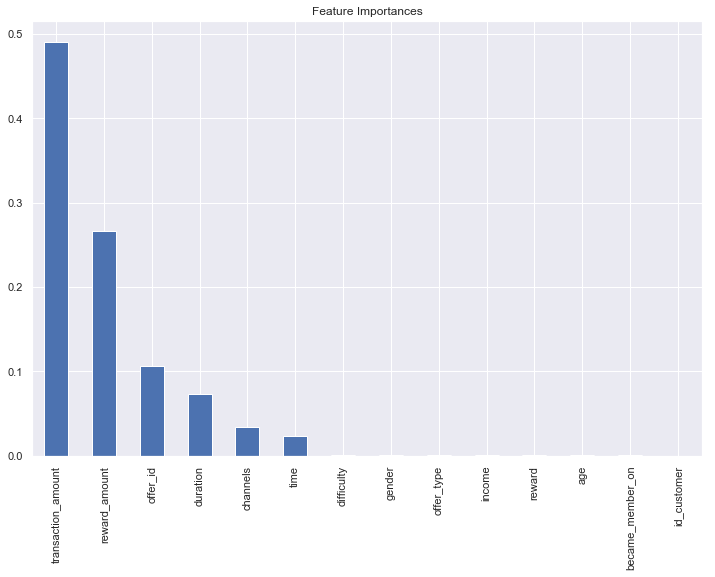

In [51]:
plot_features_importance(df_complete, top_model)

The top features that seem to dictate the likely hood a customer will transact, complete offer, view, or receive. One of the strongest predictors is reward amount, duration, the specific offer, and transaction amount. Secondary predictors apprear to be offer type, marketing saturation, and difficulty. The second and third models evaluated tell a similar story. Since offer id carries a heavy predictive power, future work could be to determine the significance of each offer for completion. Reward amount was a top predictor as well, so that is also an avenue for further work. Which amount if optimal for completion.

Interestingly enough; age, gender, income, and offer type carry no (or little) predictive power. There is some literature support this idea re: Martens and Provost (2011); at a certain point sociodemogrpahics add no additional predictive power when compared to transaction activity. 

In [42]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

# Conclusion

The top features that seem to dictate the likely hood a customer will transact, complete offer, view, or receive. One of the strongest predictors is reward amount, duration, the specific offer, and transaction amount. Secondary predictors apprear to be offer type, marketing saturation, and difficulty. The second and third models evaluated tell a similar story. Since offer id carries a heavy predictive power, future work could be to determine the significance of each offer for completion. Reward amount was a top predictor as well, so that is also an avenue for further work. Which amount if optimal for completion.

Interestingly enough; age, gender, income, and offer type carry no (or little) predictive power. There is some literature support this idea re: Martens and Provost (2011); at a certain point sociodemogrpahics add no additional predictive power when compared to transaction activity. 

## Citation

- Martens, D., & Provost, F. (2011). Pseudo-social network targeting from consumer transaction data. Workinng paper CeDER-11-05, New York University - Stern School of Business. 